# Machine Learning before Neural Networks

## TicTacToe Example

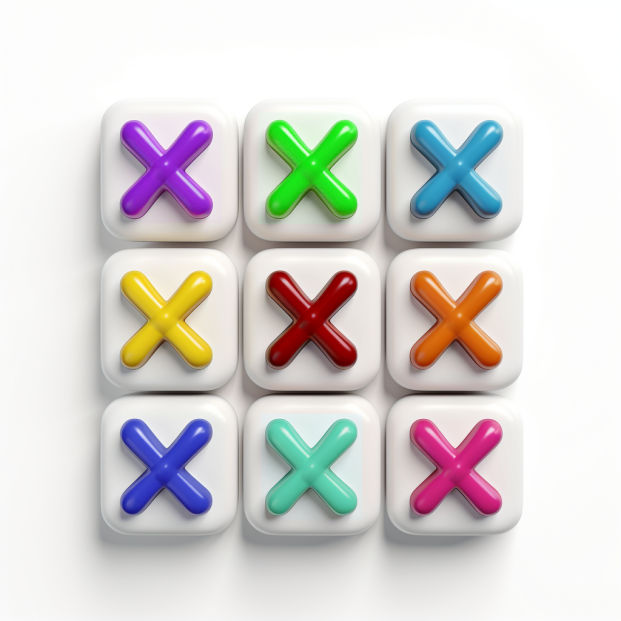

The goal is to make an AI that plays TicTacToe.
This AI will be entierly based on statistics of previous games (no neural network!). 

We will assess the quality of the AI by making it play against a robot that picks a cell at random.
Since the TicTacToe game has few options, the robot playing at random will still play well by pure luck sometimes.
Hence, the win rate against this random robot is a good metric.

The AI will be composed of boxes containing marbles.
There will be as many boxes as there are possible boards.
Since the TicTacToe grid has 3x3=9 cells, each can be empty, ticked by player 1, or ticked by player 2, we will have $3^9$ boxes.

The number of marbles in each box will represent how good the position is (how likely it will lead to a win).

The AI will pick a cell following this procedure:
- List all possible cells that can be played
- Compute the board state after playing on each possible cell
- Pick a cell at random, with probability proportional to the number of marbles in the box of the corresponding state
- Play on the selected cell

We will start with 10 marbles in each box.
In that way, the AI will play at random.

To train our AI, we will add a marble in the boxes that led to victory;
and remove one marble from boxes that led to a lost.

<img src="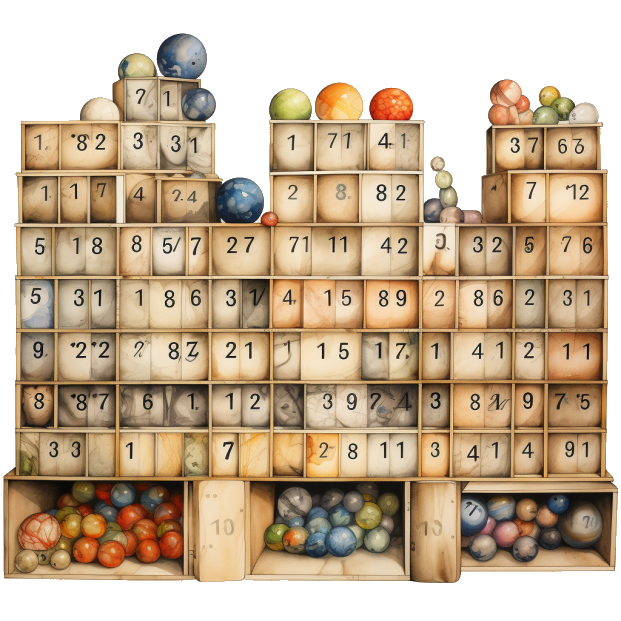
" />


We will represent the 3x3 board by a number between $0$ and $3^9-1$:
- write $0$ if the cell is empty
- write $1$ if the cell is ticked by player 1
- write $2$ if the cell is ticked by player 2
The, write down all cells one by one left to right, top to bottom, and read the sequence as a number written in base $3$.

The AI is just a list of $3^9$ number, corresponding to the number of marbles in each box.
The box correspond to board positions, but we label them with their number representation (described above).

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# function to visualize the board from it's number representation
def get_2dboard(board):
    board2d = np.zeros((3, 3), dtype=np.int8)
    for i in range(9):
        board2d[i // 3, i % 3] = board // 3**i % 3
    return board2d

# test the function
for k in [0,1,2,3,11]:
    print(f'{k}:')
    print(get_2dboard(k))

0:
[[0 0 0]
 [0 0 0]
 [0 0 0]]
1:
[[1 0 0]
 [0 0 0]
 [0 0 0]]
2:
[[2 0 0]
 [0 0 0]
 [0 0 0]]
3:
[[0 1 0]
 [0 0 0]
 [0 0 0]]
11:
[[2 0 1]
 [0 0 0]
 [0 0 0]]


In [61]:
# function to get the cells that are empty
def empty_cells(board):
    for k in range(9):
        cell = board // 3**k % 3
        if cell == 0:
            yield k

# test the function
for k in [0,1,2,3,11]:
    print(f'{k}:')
    print(list(empty_cells(k)))

0:
[0, 1, 2, 3, 4, 5, 6, 7, 8]
1:
[1, 2, 3, 4, 5, 6, 7, 8]
2:
[1, 2, 3, 4, 5, 6, 7, 8]
3:
[0, 2, 3, 4, 5, 6, 7, 8]
11:
[1, 3, 4, 5, 6, 7, 8]


In [62]:
# function to get the possible next boards
def possible_next_boards(board, symbol):
    for k in range(9):
        cell = board // 3**k % 3
        if cell == 0:
            yield board + symbol * 3**k

# test the function
for k in [0,1,2,3,11]:
    print(f'{k}:')
    print(list(possible_next_boards(k, 1)))

0:
[1, 3, 9, 27, 81, 243, 729, 2187, 6561]
1:
[4, 10, 28, 82, 244, 730, 2188, 6562]
2:
[5, 11, 29, 83, 245, 731, 2189, 6563]
3:
[4, 12, 30, 84, 246, 732, 2190, 6564]
11:
[14, 38, 92, 254, 740, 2198, 6572]


In [63]:
# function to check if the board has a winner
def win(board):
    board2d = get_2dboard(board)
    for i in range(3):
        if np.all(board2d[i, :] == 1) or np.all(board2d[:, i] == 1):
            return 1
        if np.all(board2d[i, :] == 2) or np.all(board2d[:, i] == 2):
            return 2
    if np.all(board2d.diagonal() == 1) or np.all(np.fliplr(board2d).diagonal() == 1):
        return 1
    if np.all(board2d.diagonal() == 2) or np.all(np.fliplr(board2d).diagonal() == 2):
        return 2
    return 0

# test the function
for k in [7,13,26]:
    print(f'{k}:', win(k))

7: 0
13: 1
26: 2


In [64]:
# function play at random from available cells
def strategyRandom(board, symbol=None):
    return np.random.choice(list(empty_cells(board)))

# test the function
strategyRandom(7), strategyRandom(7), strategyRandom(7)

(2, 5, 8)

In [65]:
# initialize the AI
def initAI():
    global AI
    AI = np.ones(3**9, dtype=np.int32) * 10
initAI()

In [66]:
# function to play using the AI strategy
def strategyAI(board, symbol):
    global AI
    cells = list(empty_cells(board))
    boards = list(possible_next_boards(board, symbol))
    values = np.array([AI[b] for b in boards])
    return np.random.choice(cells, 1, p=values / np.sum(values))[0]

# test the function
strategyAI(7, 1)

8

In [67]:
# function to play a game displaying steps
def game_plot(strat1, strat2):
    moves_count = 0
    board = 0
    symbol = 1
    while True:
        print(get_2dboard(board))
        if symbol == 1:
            cell = strat1(board, symbol)
        else:
            cell = strat2(board, symbol)
        board += symbol * (3**cell)
        if win(board):
            print(get_2dboard(board))
            print('win', symbol)
            return symbol
        symbol = 3 - symbol
        moves_count += 1
        if moves_count == 9:
            return 0

game_plot(strategyRandom, strategyRandom)

[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0]
 [0 0 0]
 [0 0 1]]
[[0 0 0]
 [0 0 0]
 [2 0 1]]
[[0 0 1]
 [0 0 0]
 [2 0 1]]
[[2 0 1]
 [0 0 0]
 [2 0 1]]
[[2 0 1]
 [0 1 0]
 [2 0 1]]
[[2 0 1]
 [2 1 0]
 [2 0 1]]
win 2


2

In [68]:
# function to play a game without displaying steps
def game(strat1, strat2):
    moves_count = 0
    board = 0
    symbol = 1
    while True:
        if symbol == 1:
            cell = strat1(board, symbol)
        else:
            cell = strat2(board, symbol)
        board += symbol * (3**cell)
        if win(board):
            return symbol
        symbol = 3 - symbol
        moves_count += 1
        if moves_count == 9:
            return 0

game(strategyRandom, strategyRandom)

2

In [69]:
# function to play n games
def games(strat1, strat2, n=1000):
    results = np.zeros(3)
    for i in range(n):
        results[game(strat1, strat2)] += 1
    return results / n

games(strategyRandom, strategyRandom, 10)

array([0.1, 0.7, 0.2])

In [70]:
print(games(strategyRandom, strategyRandom))
print(games(strategyRandom, strategyAI))
print(games(strategyAI, strategyRandom))
print(games(strategyAI, strategyAI))

[0.111 0.612 0.277]


[0.117 0.596 0.287]
[0.136 0.574 0.29 ]
[0.129 0.599 0.272]


In [71]:
# function to play one game and train the AI
def game_train(strat1, strat2):
    global AI
    moves_count = 0
    board = 0
    symbol = 1
    steps = []
    while True:
        steps.append(board)
        if symbol == 1:
            cell = strat1(board, symbol)
        else:
            cell = strat2(board, symbol)
        board += symbol * (3**cell)
        if win(board):
            AI[steps[symbol-1::2]] -= 1
            AI[steps[2-symbol::2]] += 1
            AI[AI < 1] = 1
            return None
        symbol = 3 - symbol
        moves_count += 1
        if moves_count == 9:
            return None

game_train(strategyAI, strategyAI)

In [72]:
# function to play n games and train the AI
def games_train(strat1, strat2, n=1000):
    for i in range(n//2):
        game_train(strat1, strat2)
        game_train(strat1, strat1)

games_train(strategyAI, strategyAI)

In [73]:
print(games(strategyRandom, strategyRandom))
print(games(strategyRandom, strategyAI))
print(games(strategyAI, strategyRandom))
print(games(strategyAI, strategyAI))

[0.133 0.564 0.303]
[0.119 0.564 0.317]
[0.118 0.65  0.232]
[0.141 0.573 0.286]


In [74]:
games_train(strategyAI, strategyAI, 10_000)
print(games(strategyRandom, strategyRandom))
print(games(strategyRandom, strategyAI))
print(games(strategyAI, strategyRandom))
print(games(strategyAI, strategyAI))

[0.149 0.552 0.299]
[0.169 0.385 0.446]
[0.124 0.738 0.138]
[0.266 0.493 0.241]


In [75]:
# function to train the AI & evaluate it
def train_eval(eval_times):
    global AI
    initAI()
    ties = []
    losts = []
    wons = []
    n = 0
    i = 0
    while i<len(eval_times):
        if n==eval_times[i]:
            ties1, wins1, losts1 = games(strategyAI, strategyRandom)
            ties2, losts2, wins2 = games(strategyRandom, strategyAI)
            ties.append((ties1 + ties2) / 2)
            losts.append((losts1 + losts2) / 2)
            wons.append((wins1 + wins2) / 2)
            i += 1
        game_train(strategyAI, strategyAI)
        n += 1
    return ties, losts, wons

In [76]:
# l = [0,100,1_000] # this takes about 20 seconds
l = [0,100,500,1_000,2_000,5_000,10_000,20_000,50_000,100_000,200_000] # this takes about 5 minutes
ties, losts, wons = train_eval(l)

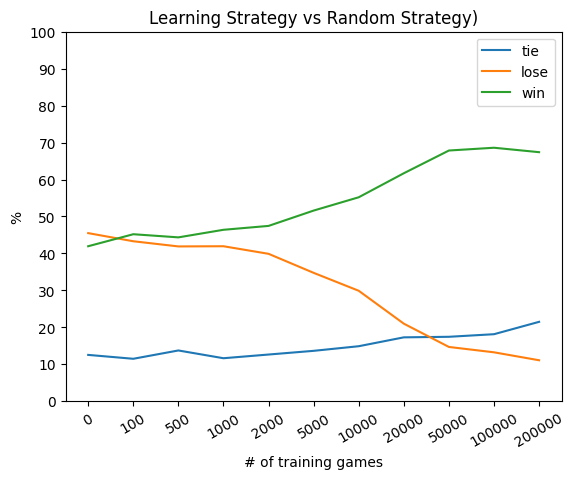

In [ ]:
plt.plot(ties, label='tie')
plt.plot(losts, label='lose')
plt.plot(wons, label='win')
plt.legend()
plt.xticks(range(len(l)), l, rotation=30)
plt.xlabel('# of training games')
plt.yticks(np.arange(0, 1.1, 0.1), np.arange(0, 110, 10))
plt.ylabel('%')
plt.title('Learning Strategy vs Random Strategy)')
plt.show()

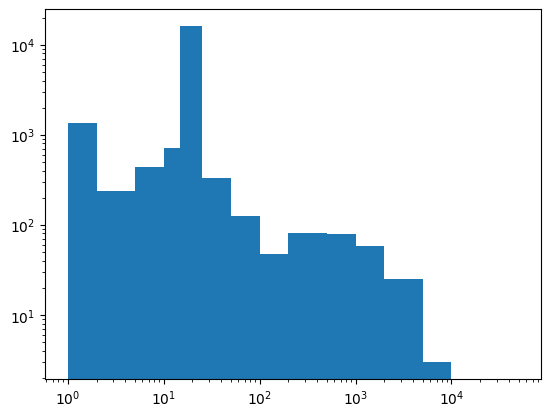

In [ ]:
# examine the state of the AI
plt.hist(AI, bins=[0,1,2,5,10,15,25,50,100,200,500,1_000,2_000,5_000,10_000,20_000,50_000])
plt.xscale('log')
plt.yscale('log')
plt.show()